# MTCNN Basics in Colab

MTCNN: multi-task cascade neural network
- Face classification
- Bounding box regression
- Landmark detection

**References**  
- AIEngineering (2020) Face Detection with MTCNN using Python  
https://www.youtube.com/watch?v=-0qQ_ukDbl8&ab_channel=AIEngineering
- Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks 
https://kpzhang93.github.io/MTCNN_face_detection_alignment/index.html
    - Paper
    https://kpzhang93.github.io/MTCNN_face_detection_alignment/paper/spl.pdf

In [1]:
!wget -O madonna.jpg https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5f7799f87453a9166172f0e0%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D330%26cropX2%3D1693%26cropY1%3D47%26cropY2%3D1410
!wget -O modi.jpg https://c.ndtvimg.com/2021-10/4sfkrgdo_pm-modi-pti_650x400_22_October_21.jpg
!wget -O john.jpg https://m.media-amazon.com/images/M/MV5BOTY4NDcyNDM5OF5BMl5BanBnXkFtZTgwMjk4Mzk0NTM@._V1_.jpg
!wget -O denzel.jpg https://static.wikia.nocookie.net/disney/images/3/3e/Denzel_Washington.jpg/revision/latest?cb=20191227233245
!wget -O volodymyr.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Volodymyr_Zelensky_Official_portrait.jpg/1024px-Volodymyr_Zelensky_Official_portrait.jpg

--2021-11-08 09:48:13--  https://thumbor.forbes.com/thumbor/fit-in/416x416/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5f7799f87453a9166172f0e0%2F0x0.jpg%3Fbackground%3D000000%26cropX1%3D330%26cropX2%3D1693%26cropY1%3D47%26cropY2%3D1410
Resolving thumbor.forbes.com (thumbor.forbes.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to thumbor.forbes.com (thumbor.forbes.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32187 (31K) [image/jpeg]
Saving to: ‘madonna.jpg’

madonna.jpg         100%[===================>]  31.43K  --.-KB/s    in 0s      

2021-11-08 09:48:13 (86.4 MB/s) - ‘madonna.jpg’ saved [32187/32187]

--2021-11-08 09:48:13--  https://c.ndtvimg.com/2021-10/4sfkrgdo_pm-modi-pti_650x400_22_October_21.jpg
Resolving c.ndtvimg.com (c.ndtvimg.com)... 104.85.5.33, 2a02:26f0:b200:381::24e8, 2a02:26f0:b200:389::24e8
Connecting to c.ndtvimg.com (c.ndtvimg.com)|104.85.5.33|:443... conne

## MTCNN setup

```
# This is formatted as code
```



In [2]:
!pip install mtcnn

In [3]:
from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

## Create a MTCNN model

In [6]:
detector = MTCNN()

faces = detector.detect_faces(img)
for face in faces:
    print(face)

{'box': [128, 52, 149, 197], 'confidence': 0.9997097849845886, 'keypoints': {'left_eye': (152, 131), 'right_eye': (216, 128), 'nose': (171, 164), 'mouth_left': (157, 202), 'mouth_right': (212, 199)}}


In [45]:
img = cv2.imread('KNOWN/john.jpg')
h, w  = img.shape[:2]
print(h,w)

2048 1450


In [46]:
500 / float(w)

0.3448275862068966

In [47]:
def resize_img(path, custom_width=500):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = custom_width
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

In [33]:
def mark_bbox(image):

    faces = detector.detect_faces(image)
    bounding_box = faces[0]['box']
    keypoints = faces[0]['keypoints']

    (top, right, left, bottom) = bounding_box[0], bounding_box[1], bounding_box[2], bounding_box[3]

    cv2.rectangle(image, 
                  (top, right),
                  (top + left, right + bottom),
                  (0, 155, 255), 3)
    
    cv2.circle(image, (keypoints['left_eye']), 2, (0,155,255), 5)
    cv2.circle(image, (keypoints['right_eye']), 2, (0,155,255), 5)
    cv2.circle(image, (keypoints['nose']), 2, (0,155,255), 5)
    cv2.circle(image, (keypoints['mouth_left']), 2, (0,155,255), 5)
    cv2.circle(image, (keypoints['mouth_right']), 2, (0,155,255), 5)

    # cv2.putText(image, name, (left + 2, bottom + 20), cv2.FONT_HERSHEY_SIMPLEX, (0,255,255), 3, fontweight='bold')

    return image

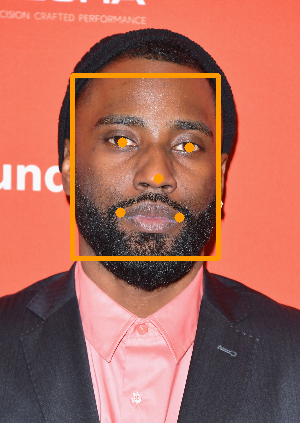

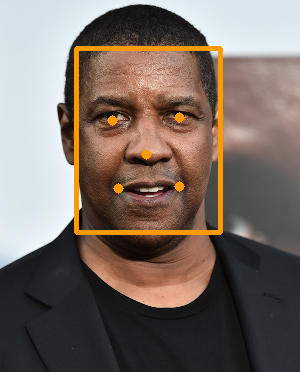

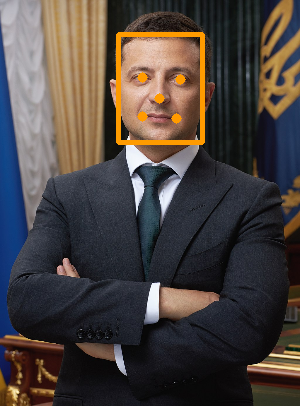

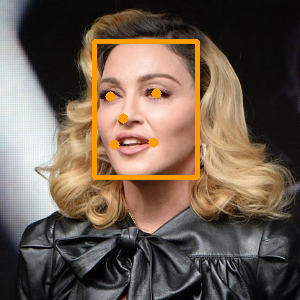

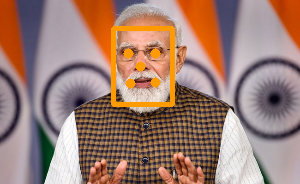

In [50]:
import os
PATH = 'KNOWN/'
KNOWN = os.listdir(PATH)

for file in KNOWN:
    if '.jpg' in file: 
        img_path = PATH + file
        img = resize_img(img_path, 300)
        cv2_imshow(mark_bbox(img))
        print('')